In [30]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
bank=pd.read_csv("E:DataSet/bank-full (3).csv", sep=';')

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [67]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Quick Basic EDA

In [6]:
import pandas_profiling as pp 
EDA=pp.ProfileReport(bank)
EDA.to_file(output_file='EDA.html') #the report can be found in the root folder

<AxesSubplot:>

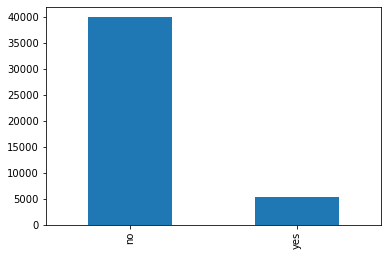

In [40]:
bank['y'].value_counts().plot(kind="bar") #count of yes and no in the data

In [22]:
#changing the categorical data to binary data
data=bank.copy()
data['housing']=data['housing'].map({'yes':1,'no':0})
data["loan"] = data["loan"].map({"yes":1, "no":0})
data["y"] = data["y"].map({"yes":1, "no":0})
data["default"] = data["default"].map({"yes":0, "no":1})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,1,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,1,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,1,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [25]:
data.corr() #correlation matrix

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,0.017879,1.000000,0.066745,0.006025,-0.077234,-0.009424,0.010021,-0.016822,0.029979,0.018329,0.022419
balance,0.097783,0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,-0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,-0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


<AxesSubplot:>

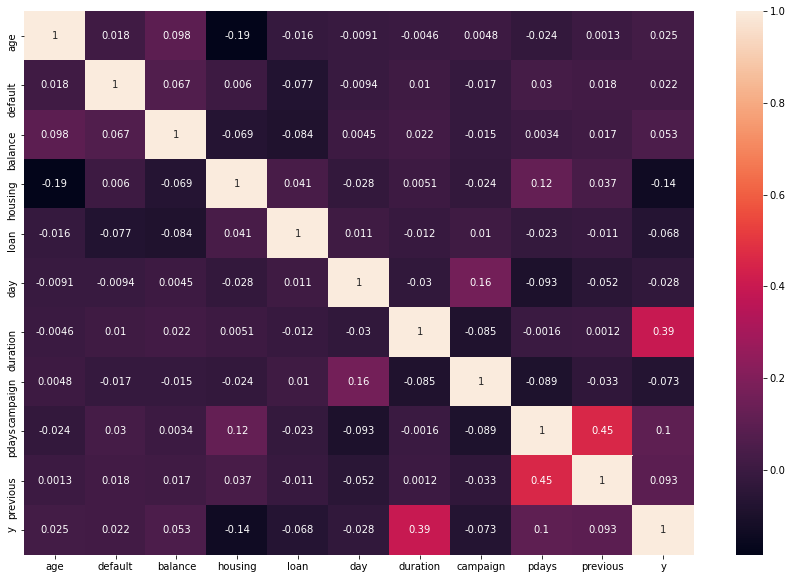

In [24]:
fig,ax=plt.subplots(figsize=(15,10)) #heatmap for correlations
sns.heatmap(data.corr(),annot=True,ax=ax)

In [26]:
#one hot encoding for rest of the categorical variables
data=pd.get_dummies(data,columns=["job","marital","education","housing","loan","contact","month","poutcome"], drop_first=True)
data

,age,default,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,2143,5,261,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,29,5,151,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,1,2,5,76,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1,1506,5,92,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,33,1,1,5,198,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,17,977,3,-1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1,1729,17,456,2,-1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,1,5715,17,1127,5,184,3,1,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,1,668,17,508,4,-1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## Building the Model

In [33]:
#SPlitting the data into train and test datasets
from sklearn.model_selection import train_test_split
x=data.iloc[:,data.columns!="y"]
y=data["y"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
#a function to get the Z-Scores 
def Zscore(i):
    x=(i-i.mean())/i.std()
    return(x)
x_train=Zscore(x_train)
x_test=Zscore(x_test)

In [49]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.coef_

array([[-0.0011536 ,  0.00581759,  0.05012884,  0.07270069,  1.11094376,
        -0.26947582, -0.03266231,  0.0201192 , -0.10161529, -0.07349765,
        -0.10069698, -0.08267422,  0.05661824, -0.03707939, -0.06469929,
         0.0371289 , -0.06098004, -0.00669069, -0.02300017, -0.12023305,
         0.02195951,  0.08723615,  0.1612503 ,  0.03751611, -0.34647541,
        -0.1699864 , -0.05695326, -0.77933706, -0.23115674,  0.05310516,
        -0.03373861, -0.19129668, -0.28949219,  0.15197825,  0.17230403,
        -0.15569627, -0.23335186,  0.11381033,  0.1195052 ,  0.02232617,
         0.41478319, -0.04944936]])

### Predicting

In [42]:
x=Zscore(x)
y_pred=model.predict(x)
data['predicted']=y_pred
data

,age,default,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,predicted
0,58,1,2143,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,1,29,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,1,2,5,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1,1506,5,92,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,33,1,1,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,17,977,3,-1,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1,1729,17,456,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
45208,72,1,5715,17,1127,5,184,3,1,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,1,668,17,508,4,-1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [45]:
prediction=data[["y","predicted"]]
prediction #checking the predictions

,y,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix #creating the confusion matrix

array([[38906,  1016],
       [ 3409,  1880]], dtype=int64)

In [59]:
train_accuracy=model.score(x_train,y_train)
test_accuracy=model.score(x_test,y_test)
print("Train Accuracy={}".format(train_accuracy))
print("Test Accuracy={}".format(test_accuracy)) 
#checking the accuracies for train and test data

Train Accuracy=0.9035927576073561
Test Accuracy=0.898997345915659


In [60]:
print(classification_report(y,y_pred)) 
#checking the precision, recall and support values

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     39922
           1       0.65      0.36      0.46      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.67      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [61]:
#getting the ROC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Roc_score=roc_auc_score(y,model.predict(x))
Roc_score

0.6650025452828326

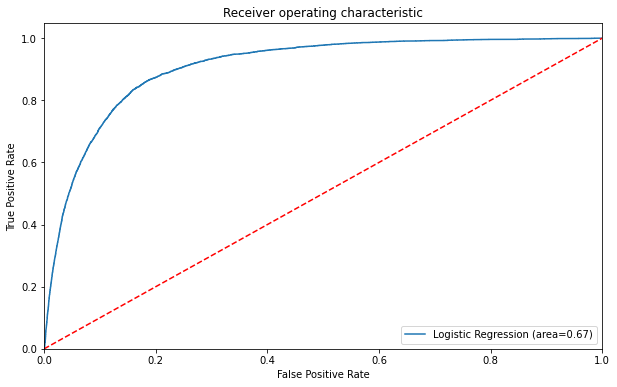

In [63]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y,model.predict_proba(x)[:,1]) 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [64]:
y_prob=pd.DataFrame(model.predict_proba(x_train)[:,1])
y_prob

,0
0,0.009751
1,0.055334
2,0.009850
3,0.009688
4,0.034404
...,...
31642,0.082764
31643,0.019074
31644,0.060673
31645,0.164560


### Using Logit model from statsmodels library

In [65]:
import statsmodels.api as sm
logit=sm.Logit(y,x)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.614937
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45169
Method:                           MLE   Df Model:                           41
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                 -0.7040
Time:                        01:53:14   Log-Likelihood:                -27802.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0163      0.013      1.215      0.224      -0.010       0.043
default                 0.0002      0.010      0.023      0.981      -0.019       0.020
balance                 0.0159      0.011      1.513      0.130      -0.005       0.036
day                     0.0454      0.012      3.817      0.000       0.022       0.069
duration                0.6568      0.013     49.281      0.000       0.631       0.683
campaign               -0.0124      0.011     -1.141      0.254      -0.034       0.009
pdays                  -0.0304      0.023     -1.304      0.192      -0.076       0.015
previous                0.0132      0.014      0.966      0.334      -0.014       0.040
job_blue-collar        -0.0324      0.016     -2.025      0.043      -0.064      -0.001
job_entrepreneur       -0.0181      0.011     -1.573      0.116      -0.041       0.004
job_housemaid          -0.0249      0.012     -2.161      0.031      -0.048      -0.002
job_management         -0.0155      0.018     -0.877      0.380      -0.050       0.019
job_retired             0.0259      0.013      1.936      0.053      -0.000       0.052
job_self-employed      -0.0170      0.012     -1.460      0.144      -0.040       0.006
job_services           -0.0133      0.013     -1.027      0.305      -0.039       0.012
job_student             0.0489      0.012      4.152      0.000       0.026       0.072
job_technician         -0.0161      0.015     -1.091      0.275      -0.045       0.013
job_unemployed         -0.0034      0.011     -0.294      0.769      -0.026       0.019
job_unknown            -0.0102      0.011     -0.956      0.339      -0.031       0.011
marital_married        -0.0262      0.016     -1.629      0.103      -0.058       0.005
marital_single          0.0183      0.017      1.067      0.286      -0.015       0.052
education_secondary     0.0135      0.016      0.824      0.410      -0.019       0.045
education_tertiary      0.0494      0.019      2.641      0.008       0.013       0.086
education_unknown       0.0076      0.012      0.649      0.516      -0.015       0.030
housing_1              -0.1083      0.012     -8.877      0.000      -0.132      -0.084
loan_1                 -0.0373      0.010     -3.598      0.000      -0.058      -0.017
contact_telephone      -0.0063      0.011     -0.589      0.556      -0.027       0.015
contact_unknown        -0.1770      0.016    -11.181      0.000      -0.208      -0.146
month_aug              -0.1061      0.018     -5.983      0.000      -0.141      -0.071
month_dec               0.0609      0.013      4.613      0.000       0.035       0.087
month_feb              -0.0100      0.014     -0.706      0.480      -0.038       0.018
month_jan              -0.0878      0.012     -7.025      0.000      -0.112      -0.063
month_jul              -0.1140      0.018     -6.468      0.000      -0.149      -0.079
month_jun               0.0328      0.019      1.728      0.084      -0.0